## Credit Card Fraud Classification

This dataset from www.kaggle.com

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from sklearn.cluster import KMeans 

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.sample(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
278818,168457.0,-1.625271,0.194933,1.283595,-0.525638,-0.024636,0.418327,0.190128,0.175990,0.360854,...,-0.082408,-0.016232,-0.531669,0.657229,0.188589,0.363400,-0.770311,-0.596609,111.35,0
54201,46330.0,1.535474,-1.131807,-0.144923,-1.800239,-0.719416,0.519301,-1.181612,0.170894,-1.885598,...,-0.236422,-0.314411,-0.102967,-1.388706,0.438087,-0.106343,0.035971,-0.008890,10.00,0
62332,50232.0,0.720829,-0.023254,0.646107,2.788371,-0.568753,-0.782589,0.548750,-0.258762,-0.935868,...,-0.015627,-0.585473,-0.051258,0.914905,0.221305,-0.246778,-0.049650,0.071006,228.05,0
5763,6142.0,-1.086170,-1.380562,3.000680,-2.507938,-1.542000,1.100609,-1.148362,0.623731,0.419572,...,-0.218438,-0.047855,-0.058457,-0.436209,0.408404,-0.289013,0.027177,0.046973,108.00,0
71649,54380.0,1.195600,0.050673,0.100518,0.269540,-0.428640,-1.058357,0.179308,-0.155068,-0.170342,...,0.004246,-0.076551,-0.050166,0.567885,0.431518,0.570589,-0.082071,-0.003664,27.83,0
254539,156779.0,0.311782,0.661920,-0.103199,-0.712484,1.506534,-0.738647,1.874182,-1.015903,0.502722,...,-0.069576,0.357976,-0.308010,0.682468,0.077032,-0.434449,-0.768464,-0.666273,7.49,0
51152,44818.0,0.195836,-2.640157,0.432509,-0.140712,-1.679865,0.872159,-0.501689,0.163220,-0.304799,...,0.409616,0.125307,-0.521082,-0.213361,0.148059,-0.274752,-0.034002,0.107920,570.49,0
24241,33135.0,1.123397,-0.023075,-0.368819,0.446878,0.064494,-0.799110,0.556126,-0.308050,-0.159167,...,-0.364708,-1.328402,-0.039256,-0.333605,0.344646,0.171111,-0.085216,0.021369,115.90,0
9600,14432.0,1.182902,-0.177921,0.705837,0.091732,-0.513347,0.126087,-0.691261,0.160507,1.644369,...,-0.020117,0.154501,-0.026722,-0.305490,0.114736,1.066583,-0.083669,-0.013102,15.95,0
117095,74536.0,1.253873,-0.069465,-0.794707,0.781603,2.005886,3.939520,-0.726427,0.958622,-0.191413,...,-0.170118,-0.460343,-0.072100,1.068503,0.582143,1.024850,-0.060337,-0.000931,4.65,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


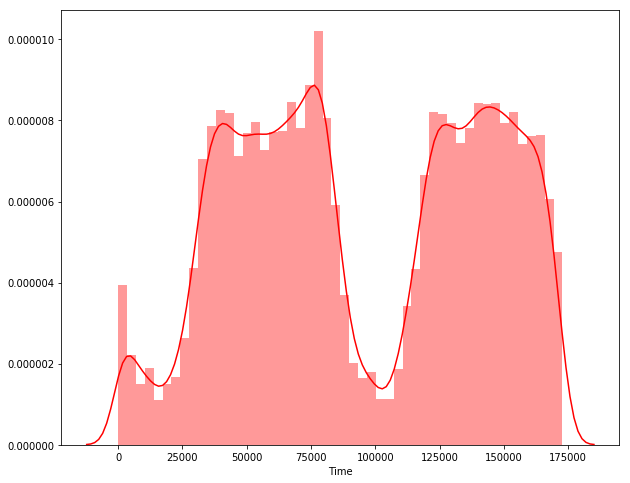

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(data.Time, color='r')

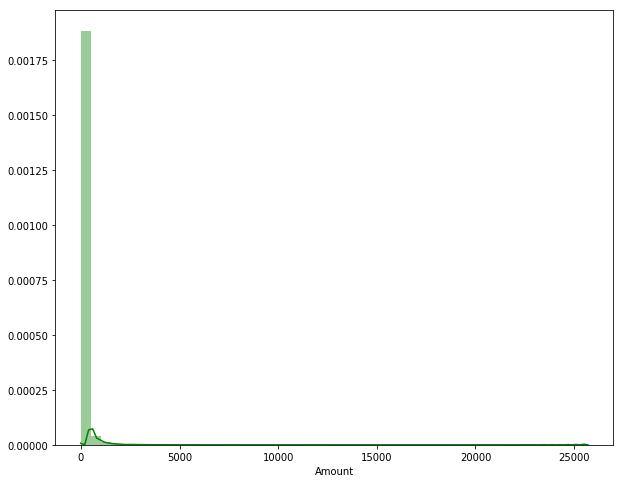

In [41]:
plt.figure(figsize=(10,8))

sns.distplot(data.Amount, color='g');

Since this dataset is imbalanced, I want to randomly sample amount in non_fraudulent same as fraudulent data.

In [49]:
fraud_data=data.query("Class==1")

In [46]:
non_fraud_data=data.query('Class==0').sample(492)

In [47]:
len(non_fraud_data)

492

In [53]:
# concat two dataset into one dataset which both has equal amounts of data: 492
equal_dat=pd.concat([fraud_data, non_fraud_data])

In [100]:
equal_dat[45:55]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10801,-1.609138,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,-0.349231,1
10891,-1.603326,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,-5.304631,...,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,0.401529,1
10897,-1.603010,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,-0.349231,1
11343,-1.580436,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,...,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,-0.349231,1
11710,-1.575193,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,...,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,-0.349231,1
11841,-1.568433,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,...,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,-0.349231,1
11880,-1.565927,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,-0.349231,1
12070,-1.555820,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,-0.349231,1
12108,-1.553398,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,...,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,-0.349231,1
12261,-1.545543,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,-0.349231,1


In [98]:
equal_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 541 to 81856
Data columns (total 31 columns):
Time      984 non-null float64
V1        984 non-null float64
V2        984 non-null float64
V3        984 non-null float64
V4        984 non-null float64
V5        984 non-null float64
V6        984 non-null float64
V7        984 non-null float64
V8        984 non-null float64
V9        984 non-null float64
V10       984 non-null float64
V11       984 non-null float64
V12       984 non-null float64
V13       984 non-null float64
V14       984 non-null float64
V15       984 non-null float64
V16       984 non-null float64
V17       984 non-null float64
V18       984 non-null float64
V19       984 non-null float64
V20       984 non-null float64
V21       984 non-null float64
V22       984 non-null float64
V23       984 non-null float64
V24       984 non-null float64
V25       984 non-null float64
V26       984 non-null float64
V27       984 non-null float64
V28       984 non-null 

Text(0.5, 0, 'Class: (0=non_fraudulent | 1=fraudulent)')

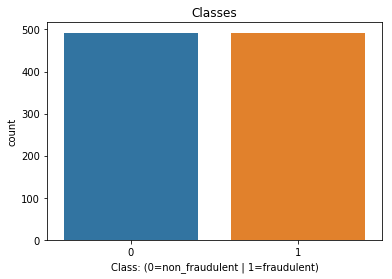

In [62]:
sns.countplot(x="Class", data=equal_dat)
plt.title("Classes")
plt.xlabel("Class: (0=non_fraudulent | 1=fraudulent)")

Now, class 1 and 0 are equal. 

In [64]:
X=equal_dat.drop('Class', axis=1)
y=equal_dat.Class


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

Define classifiers

In [102]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

rf=RandomForestClassifier(n_estimators=10, max_depth=2)
rf.fit(X_train, y_train)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
svm_clf=SVC()
svm_clf.fit(X_train, y_train)
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=10,learning_rate=0.01)
ada.fit(X_train,y_train)
xgb=XGBClassifier(learning_rate=0.01, max_depth=2, n_estimators=10)
xgb.fit(X_train,y_train)

C:\Users\Raymond\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Raymond\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [118]:
def Clf_Models(clf):
    prediction=clf.predict(X_test)
    print("Confusion Maxtrix: ",'\n')
    print(confusion_matrix(y_test, prediction),'\n')
    print("////////////////////////////////////",'\n')
    print("Classification Report:",'\n')
    print(classification_report(y_test, prediction),'\n')
  
    roc=roc_auc_score(y_test, prediction)
    print("ROC_AUC",roc)
    

Logistics Model

In [110]:
print("Logistics Model")
Clf_Models(logmodel)

Logistics Model
Confusion Maxtrix:  

[[97  1]
 [ 6 93]] 

//////////////////////////////////// 

Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        98
           1       0.99      0.94      0.96        99

   micro avg       0.96      0.96      0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197
 

ROC_AUC 0.9645949288806431


In [111]:
print("SVM")
Clf_Models(svm_clf)

SVM
Confusion Maxtrix:  

[[94  4]
 [ 6 93]] 

//////////////////////////////////// 

Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        98
           1       0.96      0.94      0.95        99

   micro avg       0.95      0.95      0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197
 

ROC_AUC 0.9492888064316636


In [112]:
print("Random Forest")
Clf_Models(rf)

Random Forest
Confusion Maxtrix:  

[[97  1]
 [11 88]] 

//////////////////////////////////// 

Classification Report: 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        98
           1       0.99      0.89      0.94        99

   micro avg       0.94      0.94      0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197
 

ROC_AUC 0.9393424036281178


In [113]:
print("AdaBoost")
Clf_Models(ada)

AdaBoost
Confusion Maxtrix:  

[[96  2]
 [15 84]] 

//////////////////////////////////// 

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        98
           1       0.98      0.85      0.91        99

   micro avg       0.91      0.91      0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197
 

ROC_AUC 0.9140383426097712


In [125]:
print("KNN")
Clf_Models(knn)

KNN
Confusion Maxtrix:  

[[96  2]
 [ 7 92]] 

//////////////////////////////////// 

Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        98
           1       0.98      0.93      0.95        99

   micro avg       0.95      0.95      0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197
 

ROC_AUC 0.9544423830138116


In [115]:
print("XGBooster")
Clf_Models(xgb)

XGBooster
Confusion Maxtrix:  

[[91  7]
 [ 3 96]] 

//////////////////////////////////// 

Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        98
           1       0.93      0.97      0.95        99

   micro avg       0.95      0.95      0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197
 

ROC_AUC 0.9491341991341993


Let's move back to original dataset 

Text(0.5, 1.0, 'Classes')

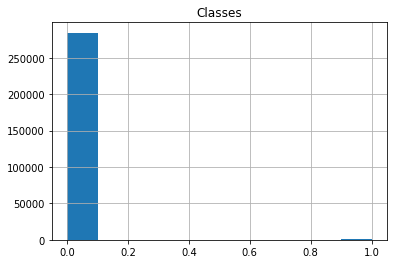

In [51]:
data.Class.hist()
plt.title("Classes")

Correlation heatmap shows any significant correlations between our predictors, especially with regards to our class variable. 

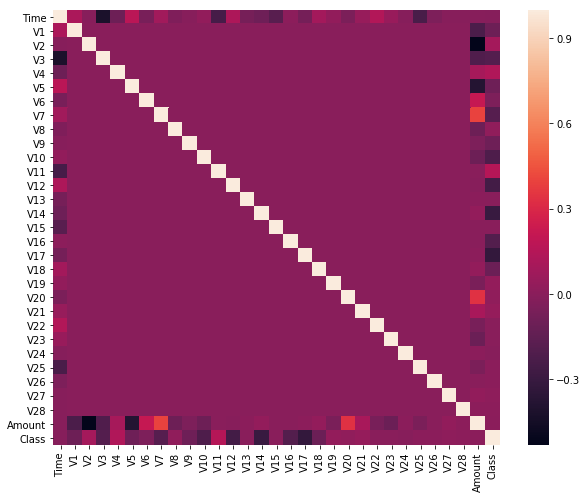

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

In [126]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
scale=StandardScaler()
data[['Time','Amount']]=scale.fit_transform(data[['Time','Amount']])

In [127]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [145]:
X_data=data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y_data=data.Class

In [146]:
X_training, X_testing, y_training, y_testing = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

Define classifiers

In [150]:
# Models to used:
log_clf=LogisticRegression()
log_clf.fit(X_training, y_training)
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_training,y_training)


C:\Users\Raymond\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [152]:
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=10,learning_rate=0.01)
ada_clf.fit(X_training,y_training)
xgb_clf=XGBClassifier(learning_rate=0.01, max_depth=2, n_estimators=10)
xgb_clf.fit(X_training,y_training)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [153]:
def clf_models(clf):
    pred=clf.predict(X_testing)
    # pred_probs = clf.predict_proba(X_test)[:,1]
    roc=roc_auc_score(y_testing, pred)
    
    # print("Prediction probability: {}".format(pred_probs))
    print("roc_auc_score: {}".format(roc))

In [154]:
clf_models(log_clf)

roc_auc_score: 0.8153669732972618


In [156]:
clf_models(knn_clf)

roc_auc_score: 0.8891818199893547


In [157]:
clf_models(xgb_clf)

roc_auc_score: 0.8622456007647621


In [158]:
clf_models(ada_clf)

roc_auc_score: 0.8689570101607353


In [23]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
y_kmeans=kmeans.predict(X_data)
print(y_kmeans)

[0 1 0 ... 1 0 0]


In [27]:
kmeans.inertia_

8071092.808705544

In [31]:
sse_ = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k).fit(X_data)
    sse_.append([k, kmeans.inertia_])

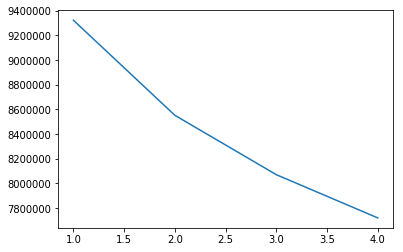

In [32]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);